<a href="https://colab.research.google.com/github/anaperez10/Analiticalll-Finanzas/blob/main/Analitica_3_Seguros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Carga de librerias, paquetes y bases de datos**

In [1]:
#Conexión con colab
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from unicodedata import normalize

Mounted at /content/drive


In [2]:
#Importar paquetes
import pandas as pd
import numpy as np
from unicodedata import normalize
from sklearn.model_selection import RandomizedSearchCV
import plotly.graph_objs as go #Graficos
import plotly.express as px
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt ### gráficos
from sklearn import linear_model ## para regresión lineal
from sklearn import tree ###para ajustar arboles de decisión
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor ##Ensamble con bagging
from sklearn.ensemble import GradientBoostingRegressor ###Ensamble boosting
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

In [5]:
#Leer cada una de las bases de datos
expustos= pd.read_table('/content/drive/MyDrive/CursoAnalitica3/BD_Expuestos.txt')
socio =pd.read_table('/content/drive/MyDrive/CursoAnalitica3/BD_Sociodemograficas.txt', encoding='latin-1')
siniestros =pd.read_table('/content/drive/MyDrive/CursoAnalitica3/DB_Siniestros.txt',encoding='latin-1')

**Limpieza y transformación de datos**

Base de datos de expuestos

In [20]:
#Observar los primeros cinco datos de la base de datos expuestos 
expustos.head(5)

,asegurado_id,poliza_asegurado_id,fecha_inicio,fecha_cancelacion,fecha_fin
0,16286173,125696117,2018-01-01,2018-04-10 00:00:00,2018-04-10
1,11885152,141320760,2018-01-01,0,2019-12-31
2,763957,162532851,2018-01-01,0,2019-12-31
3,29082204,154620473,2018-01-01,2018-04-19 00:00:00,2018-04-19
4,4567640,93633862,2018-01-01,0,2019-12-31


In [41]:
#Pasar el nombre de las columnas a minusculas
print(expustos.columns)
expustos.columns= expustos.columns.str.lower()

Index(['asegurado_id', 'poliza_asegurado_id', 'fecha_inicio',
       'fecha_cancelacion', 'fecha_fin', 'Cancelacion'],
      dtype='object')


In [18]:
#Tipo de variables de la base de datos expuestos 
expustos.dtypes

asegurado_id                    int64
poliza_asegurado_id             int64
fecha_inicio           datetime64[ns]
fecha_cancelacion              object
fecha_fin              datetime64[ns]
dtype: object

In [15]:
#Dimensión de base de datos expuestos 
expustos.shape

(300900, 5)

In [16]:
#Información de base de datos expuestos 
#No hay presencia de datos nulos
expustos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300900 entries, 0 to 300899
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   asegurado_id         300900 non-null  int64         
 1   poliza_asegurado_id  300900 non-null  int64         
 2   fecha_inicio         300900 non-null  datetime64[ns]
 3   fecha_cancelacion    300900 non-null  object        
 4   fecha_fin            300900 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 11.5+ MB


In [25]:
#Cambar el tipo de dato de las fechas a datetime
expustos['fecha_inicio']=pd.to_datetime(expustos['fecha_inicio'])
expustos['fecha_cancelacion']=pd.to_datetime(expustos['fecha_cancelacion'])
expustos['fecha_fin']=pd.to_datetime(expustos['fecha_fin'])

ValueError: ignored

In [23]:
#Verificar el tipo de datos de las fechas
expustos.dtypes

asegurado_id                    int64
poliza_asegurado_id             int64
fecha_inicio           datetime64[ns]
fecha_cancelacion              object
fecha_fin              datetime64[ns]
dtype: object

In [28]:
#Reemplazar datos nulos por 0
expustos=expustos.fillna(0)

In [27]:
#Función de categorizar la variable fecha de cancelación en 0 y 1
def categorizar(fila):
    fecha_cancelacion = fila.fecha_cancelacion
    if fecha_cancelacion  == 0:
      return 0
    else:
      return 1


In [29]:
#Crear nuevo campo llamado Cancelación con la función categorizar
expustos["Cancelacion"] = expustos.apply(categorizar, axis=1)

In [30]:
#Observar nuevamente la base de datos de expuestos al realizar la depuración de los datos
expustos

,asegurado_id,poliza_asegurado_id,fecha_inicio,fecha_cancelacion,fecha_fin,Cancelacion
0,16286173,125696117,2018-01-01,2018-04-10 00:00:00,2018-04-10,1
1,11885152,141320760,2018-01-01,0,2019-12-31,0
2,763957,162532851,2018-01-01,0,2019-12-31,0
3,29082204,154620473,2018-01-01,2018-04-19 00:00:00,2018-04-19,1
4,4567640,93633862,2018-01-01,0,2019-12-31,0
...,...,...,...,...,...,...
300895,28476983,53646742,2018-01-01,0,2019-12-31,0
300896,8479396,89963102,2018-01-01,2018-03-08 00:00:00,2018-03-08,1
300897,6598270,165960557,2018-02-28,0,2019-12-31,0
300898,1000907,105811540,2018-01-01,0,2019-12-31,0


Base de datos de siniestros

In [31]:
#Observar los primeros cinco datos de la base de datos de siniestros
siniestros.head(5)

,Mes_Pago,Asegurado_Id,Reclamacion,Diagnostico_Codigo,Diagnostico_Desc,Eventos,Valor_Pagado
0,201803,4834968,EXAMENES DE DIAGNOSTICO,Z011,EXAMEN DE OÍDOS Y DE LA AUDICIÓN,1,111600.00
1,201909,14915125,EXAMENES DE DIAGNOSTICO,9,DIAGNÓSTICO PENDIENTE,1,50468.00
2,201807,42959949,EXAMENES DE DIAGNOSTICO,9,DIAGNÓSTICO PENDIENTE,1,610452.00
3,201803,30540131,CONSULTA EXTERNA,9,DIAGNÓSTICO PENDIENTE,1,42160.00
4,201905,21442420,LABORATORIO CLINICO,9,DIAGNÓSTICO PENDIENTE,18,617336.48


In [32]:
#Observar columnas de base de datos siniestros y pasar columnas a minusculas
siniestros.columns
siniestros.columns= siniestros.columns.str.lower()

Index(['Mes_Pago', 'Asegurado_Id', 'Reclamacion', 'Diagnostico_Codigo',
       'Diagnostico_Desc', 'Eventos', 'Valor_Pagado'],
      dtype='object')

In [33]:
#Tipo de datos de la base de datos siniestros
siniestros.dtypes

Mes_Pago                int64
Asegurado_Id            int64
Reclamacion            object
Diagnostico_Codigo     object
Diagnostico_Desc       object
Eventos                 int64
Valor_Pagado          float64
dtype: object

In [34]:
#Dimensiones de la base de datos siniestros
siniestros.shape

(3308480, 7)

In [35]:
#Información de la base de datos siniestros 
siniestros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3308480 entries, 0 to 3308479
Data columns (total 7 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Mes_Pago            int64  
 1   Asegurado_Id        int64  
 2   Reclamacion         object 
 3   Diagnostico_Codigo  object 
 4   Diagnostico_Desc    object 
 5   Eventos             int64  
 6   Valor_Pagado        float64
dtypes: float64(1), int64(3), object(3)
memory usage: 176.7+ MB


In [36]:
#Observar si existen datos nulos 
siniestros.isnull().sum()

Mes_Pago              0
Asegurado_Id          0
Reclamacion           0
Diagnostico_Codigo    0
Diagnostico_Desc      0
Eventos               0
Valor_Pagado          0
dtype: int64

In [37]:
#Imprimir categorias de las variables
lista = ['Reclamacion','Diagnostico_Codigo','Diagnostico_Desc']
for i in lista:
    print(siniestros[i].value_counts())
    print('------------------------------------')

CONSULTA EXTERNA                                                   1255793
EXAMENES DE DIAGNOSTICO                                             694238
LABORATORIO CLINICO                                                 520214
CONSULTA DE URGENCIAS                                               365872
CIRUGIA AMBULATORIA POR ENFERMEDAD                                  106397
FISIOTERAPIA ILIMITADA                                               98370
TRATAMIENTOS ESPECIFICOS                                             49708
TRATAMIENTO MEDICO AMBULATORIO POR ACCIDENTES                        39360
CONSULTAS PRENATALES                                                 33685
TRATAMIENTO MEDICO HOSPITALARIO POR ENFERMEDAD                       28504
TRATAMIENTO QUIRURGICO HOSPITALARIO POR ENFERMEDAD                   20484
CIRUGIA AMBULATORIA POR ACCIDENTE                                    17594
TRATAMIENTO AMBULATORIO POR CANCER                                   14949
INFILTRACIONES           

Base de datos sociodemograficas

In [38]:
#Observar los primeros cinco datos de la base de datos sociodemografica
socio.head(5)

,Asegurado_Id,Sexo_Cd,FechaNacimiento,Regional,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR
0,18686469,F,1984/01/17,REGIONAL ANTIOQUIA,0,0,0,0,0
1,16087775,M,1984/03/12,REGIONAL NORTE,0,0,0,0,0
2,35757761,F,1993/12/19,REGIONAL ANTIOQUIA,0,0,0,0,0
3,48691460,M,2000/11/14,REGIONAL ANTIOQUIA,0,0,0,0,0
4,36074099,F,2015/08/06,REGIONAL CENTRO,0,0,0,0,0


In [42]:
#Observar columnas de la base de datos sociodemografica y pasar las columnas a minusculas
socio.columns
expustos.columns= expustos.columns.str.lower()

In [43]:
#Tipos de datos de la base de datos sociodemografica
socio.dtypes

Asegurado_Id           int64
Sexo_Cd               object
FechaNacimiento       object
Regional              object
CANCER                 int64
EPOC                   int64
DIABETES               int64
HIPERTENSION           int64
ENF_CARDIOVASCULAR     int64
dtype: object

In [44]:
#Convertir tipo de dato de object a datetime de la fecha de nacimiento
socio['FechaNacimiento']=pd.to_datetime(socio['FechaNacimiento'])

In [45]:
#Observar dimensiones de la base de datos sociodemografica 
socio.shape

(267312, 9)

In [46]:
#Información de la base de datos sociodemografica
socio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267312 entries, 0 to 267311
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Asegurado_Id        267312 non-null  int64         
 1   Sexo_Cd             267312 non-null  object        
 2   FechaNacimiento     267312 non-null  datetime64[ns]
 3   Regional            267311 non-null  object        
 4   CANCER              267312 non-null  int64         
 5   EPOC                267312 non-null  int64         
 6   DIABETES            267312 non-null  int64         
 7   HIPERTENSION        267312 non-null  int64         
 8   ENF_CARDIOVASCULAR  267312 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 18.4+ MB


In [47]:
#Imprimir categorias de las variables
lista = ['Sexo_Cd','Regional','CANCER','EPOC','DIABETES','HIPERTENSION','ENF_CARDIOVASCULAR']
for i in lista:
    print(socio[i].value_counts())
    print('------------------------------------')

F     145430
M     121877
-1         5
Name: Sexo_Cd, dtype: int64
------------------------------------
REGIONAL CENTRO          127149
REGIONAL ANTIOQUIA        49722
REGIONAL OCCIDENTE        46180
REGIONAL NORTE            34845
REGIONAL EJE CAFETERO      9342
Sin Información              73
Name: Regional, dtype: int64
------------------------------------
0    262929
1      4383
Name: CANCER, dtype: int64
------------------------------------
0    266055
1      1257
Name: EPOC, dtype: int64
------------------------------------
0    263774
1      3538
Name: DIABETES, dtype: int64
------------------------------------
0    250566
1     16746
Name: HIPERTENSION, dtype: int64
------------------------------------
0    266387
1       925
Name: ENF_CARDIOVASCULAR, dtype: int64
------------------------------------


In [48]:
#Pasar los nulos de usuarios a sin información
socio['Sexo_Cd'] = socio['Sexo_Cd'].replace('-1','F')

In [49]:
#Eliminar el resto de datos nulos
socio=socio.dropna()

In [51]:
#Calcular edad 
socio['edad']=2019-socio.FechaNacimiento.dt.year

In [52]:
#Contar los valores de edad
socio['edad'].value_counts()

 35     6748
 38     6745
 39     6735
 37     6587
 34     6526
        ... 
-2         3
 102       3
-3         2
 103       2
 105       1
Name: edad, Length: 109, dtype: int64

In [53]:
#Volver la edad 0 si la resta es un valor menor a cero
socio.loc[socio[socio.edad<0].index,['edad']]=0

In [54]:
#Función para categorizar la edad 
def categorizar1(fila):
    edad = fila.edad
    if edad  < 6:
      return 'Primera infancia'
    elif edad < 11:
      return 'Infancia'
    elif edad < 18:
      return 'Adolescencia'
    elif edad < 28:
      return 'Jovenes'
    elif edad <59:
      return'Adultez'
    elif edad >60:
      return 'Persona Mayor'


In [56]:
#Crear variable curso de vida donde se aplica la función categorizar1 para clasificar los datos 
socio["curso de vida"] = socio.apply(categorizar1, axis=1)

Union de las bases de datos

In [57]:
#Se une la base de datos sociodemograficas y la base de datos de siniestros 
dfcx = pd.merge(socio,siniestros, on = 'Asegurado_Id',how = 'inner')
dfcx.head(3)

,Asegurado_Id,Sexo_Cd,FechaNacimiento,Regional,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR,edad,curso de vida,Mes_Pago,Reclamacion,Diagnostico_Codigo,Diagnostico_Desc,Eventos,Valor_Pagado
0,18686469,F,1984-01-17,REGIONAL ANTIOQUIA,0,0,0,0,0,35,Adultez,201912,EXAMENES DE DIAGNOSTICO,9,DIAGNÓSTICO PENDIENTE,3,1027462.76
1,18686469,F,1984-01-17,REGIONAL ANTIOQUIA,0,0,0,0,0,35,Adultez,201912,CONSULTA EXTERNA,9,DIAGNÓSTICO PENDIENTE,1,67208.00
2,16087775,M,1984-03-12,REGIONAL NORTE,0,0,0,0,0,35,Adultez,201810,CONSULTA DE URGENCIAS,9,DIAGNÓSTICO PENDIENTE,1,83111.00


In [58]:
#Se observa si existe algún dato nulo
dfcx.isnull().sum()

Asegurado_Id              0
Sexo_Cd                   0
FechaNacimiento           0
Regional                  0
CANCER                    0
EPOC                      0
DIABETES                  0
HIPERTENSION              0
ENF_CARDIOVASCULAR        0
edad                      0
curso de vida         80806
Mes_Pago                  0
Reclamacion               0
Diagnostico_Codigo        0
Diagnostico_Desc          0
Eventos                   0
Valor_Pagado              0
dtype: int64

In [59]:
#Se renombra uno de los campos de la base de datos expuestos
expustos1 = expustos.rename(columns={'asegurado_id':'Asegurado_Id'})

In [60]:
#Se une la base de datos creada anteriormente dfcx con expuestos1
dfcx1 = pd.merge(dfcx,expustos1, on = 'Asegurado_Id',how = 'inner')
dfcx1.head(3)

,Asegurado_Id,Sexo_Cd,FechaNacimiento,Regional,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR,edad,...,Reclamacion,Diagnostico_Codigo,Diagnostico_Desc,Eventos,Valor_Pagado,poliza_asegurado_id,fecha_inicio,fecha_cancelacion,fecha_fin,cancelacion
0,18686469,F,1984-01-17,REGIONAL ANTIOQUIA,0,0,0,0,0,35,...,EXAMENES DE DIAGNOSTICO,9,DIAGNÓSTICO PENDIENTE,3,1027462.76,202863951,2019-10-31,0,2019-12-31,0
1,18686469,F,1984-01-17,REGIONAL ANTIOQUIA,0,0,0,0,0,35,...,CONSULTA EXTERNA,9,DIAGNÓSTICO PENDIENTE,1,67208.00,202863951,2019-10-31,0,2019-12-31,0
2,16087775,M,1984-03-12,REGIONAL NORTE,0,0,0,0,0,35,...,CONSULTA DE URGENCIAS,9,DIAGNÓSTICO PENDIENTE,1,83111.00,139441379,2018-01-01,2019-12-31 00:00:00,2019-12-31,1


In [61]:
#Observar dimensión de nueva base de datos 
dfcx1.shape

(3781424, 22)

In [62]:
#Observar si existe la presencia de datos nulos
dfcx1.isnull().sum()

Asegurado_Id               0
Sexo_Cd                    0
FechaNacimiento            0
Regional                   0
CANCER                     0
EPOC                       0
DIABETES                   0
HIPERTENSION               0
ENF_CARDIOVASCULAR         0
edad                       0
curso de vida          93009
Mes_Pago                   0
Reclamacion                0
Diagnostico_Codigo         0
Diagnostico_Desc           0
Eventos                    0
Valor_Pagado               0
poliza_asegurado_id        0
fecha_inicio               0
fecha_cancelacion          0
fecha_fin                  0
cancelacion                0
dtype: int64

In [ ]:
#Se elimina la variable de curso de vida
dfcx1=dfcx1.drop(['curso de vida'], axis=1)

In [63]:
#Se crea nuevamente el campo de curso de vida y se aplica la función de categorizar
dfcx1["curso de vida"] = dfcx1.apply(categorizar1, axis=1)

In [ ]:
dfcx1

,Asegurado_Id,Sexo_Cd,FechaNacimiento,Regional,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR,edad,...,Reclamacion,Diagnostico_Codigo,Diagnostico_Desc,Eventos,Valor_Pagado,poliza_asegurado_id,fecha_inicio,fecha_cancelacion,fecha_fin,Cancelacion
0,18686469,F,1984-01-17,REGIONAL ANTIOQUIA,0,0,0,0,0,35,...,EXAMENES DE DIAGNOSTICO,9,DIAGNÓSTICO PENDIENTE,3,1027462.76,202863951,2019-10-31,0,2019-12-31,0
1,18686469,F,1984-01-17,REGIONAL ANTIOQUIA,0,0,0,0,0,35,...,CONSULTA EXTERNA,9,DIAGNÓSTICO PENDIENTE,1,67208.00,202863951,2019-10-31,0,2019-12-31,0
2,16087775,M,1984-03-12,REGIONAL NORTE,0,0,0,0,0,35,...,CONSULTA DE URGENCIAS,9,DIAGNÓSTICO PENDIENTE,1,83111.00,139441379,2018-01-01,2019-12-31 00:00:00,2019-12-31,1
3,16087775,M,1984-03-12,REGIONAL NORTE,0,0,0,0,0,35,...,CONSULTA DE URGENCIAS,9,DIAGNÓSTICO PENDIENTE,1,194166.64,139441379,2018-01-01,2019-12-31 00:00:00,2019-12-31,1
4,16087775,M,1984-03-12,REGIONAL NORTE,0,0,0,0,0,35,...,CONSULTA DE URGENCIAS,9,DIAGNÓSTICO PENDIENTE,1,77729.40,139441379,2018-01-01,2019-12-31 00:00:00,2019-12-31,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3781419,4419287,F,1950-10-06,REGIONAL NORTE,0,0,0,0,0,69,...,CONSULTA DE URGENCIAS,9,DIAGNÓSTICO PENDIENTE,1,66600.40,55104420,2018-01-01,0,2019-12-31,0
3781420,4419287,F,1950-10-06,REGIONAL NORTE,0,0,0,0,0,69,...,CIRUGIA AMBULATORIA POR ENFERMEDAD,H269,"CATARATA, NO ESPECIFICADA",1,5727075.16,55104420,2018-01-01,0,2019-12-31,0
3781421,4419287,F,1950-10-06,REGIONAL NORTE,0,0,0,0,0,69,...,FISIOTERAPIA ILIMITADA,9,DIAGNÓSTICO PENDIENTE,24,404240.00,55104420,2018-01-01,0,2019-12-31,0
3781422,4419287,F,1950-10-06,REGIONAL NORTE,0,0,0,0,0,69,...,EXAMENES DE DIAGNOSTICO,9,DIAGNÓSTICO PENDIENTE,3,835885.24,55104420,2018-01-01,0,2019-12-31,0


In [64]:
#Contar los valores del campo curso de vida
dfcx1['curso de vida'].value_counts()

Adultez             2097884
Persona Mayor        547524
Primera infancia     386750
Jovenes              301243
Adolescencia         178583
Infancia             176431
Name: curso de vida, dtype: int64

In [ ]:
#Eliminar datos nulos de la base de datos unida 
dfcx1=dfcx1.dropna()

**Análisis Exploratorio**

In [ ]:
expustos.columns

Index(['asegurado_id', 'poliza_asegurado_id', 'fecha_inicio',
       'fecha_cancelacion', 'fecha_fin', 'Cancelacion'],
      dtype='object')

In [ ]:
df=pd.Series(expustos.fecha_fin - expustos.fecha_inicio).dt.days.value_counts().reset_index().rename(columns={'index':'Dias',0:'tamaño'})

In [ ]:
#Tiempo en dias en que las personas piden los seguros.
fig=px.bar(df.drop(index=[0,1]),x='Dias', y='tamaño', color_discrete_sequence =  px.colors.sequential.Aggrnyl)
fig.update_layout(font=dict(size=15)) 
fig.show()

In [ ]:
#Distribucion de las personas que cancenlan el seguro antes de terminar
# crear dataset
dic = {0:'No canceló',
       1:'Canceló'}
base = expustos.groupby(['Cancelacion'])[['asegurado_id']].count().sort_values('asegurado_id', ascending = False).reset_index()
base['Cancelacion'] = base['Cancelacion'].replace(dic)
# crear gráfica
fig = px.pie(base, values = 'asegurado_id', names ='Cancelacion',
             title= '<b>Participación de las personas que cancenlan el seguro antes de terminar<b>',
             color_discrete_sequence=px.colors.qualitative.G10)

# agregar detalles a la gráfica
fig.update_layout(
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [ ]:
df=pd.Series(expustos.fecha_inicio.dt.month_name().value_counts()).reset_index().rename(columns={'index':'Mes','fecha_inicio':'tamaño'})

In [ ]:
fig=px.bar(df,x='Mes',y='tamaño',color_discrete_sequence =  px.colors.sequential.Aggrnyl )
fig.update_layout(font=dict(size=15))
fig.show()

Exploración de base de datos Siniestros

In [ ]:
siniestros.columns

Index(['Mes_Pago', 'Asegurado_Id', 'Reclamacion', 'Diagnostico_Codigo',
       'Diagnostico_Desc', 'Eventos', 'Valor_Pagado'],
      dtype='object')

In [ ]:
# crear dataset
base = siniestros.groupby(['Diagnostico_Desc'])[['Valor_Pagado']].sum().sort_values('Valor_Pagado', ascending = False).reset_index().head(10)

# crear gráfica
fig = px.bar(base, x = 'Diagnostico_Desc', y='Valor_Pagado',
             title= '<b>Costos por el diagnostico<b>',
             color_discrete_sequence=px.colors.qualitative.G10)

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Año',
    yaxis_title = 'Precio de venta',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [ ]:
# crear dataset
base = siniestros.groupby(['Reclamacion'])[['Valor_Pagado']].sum().sort_values('Valor_Pagado', ascending = False).reset_index().head(10)

# crear gráfica
fig = px.bar(base, x = 'Reclamacion', y='Valor_Pagado',
             title= '<b>Costos por el tipo de reclamacion<b>',
             color_discrete_sequence=px.colors.qualitative.G10)

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Año',
    yaxis_title = 'Precio de venta',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

Exploracion de base de datos Socio 

In [ ]:
socio.columns

Index(['Asegurado_Id', 'Sexo_Cd', 'FechaNacimiento', 'Regional', 'CANCER',
       'EPOC', 'DIABETES', 'HIPERTENSION', 'ENF_CARDIOVASCULAR', 'edad',
       'curso de vida'],
      dtype='object')

In [ ]:
# crear dataset
base = socio.groupby(['Sexo_Cd'])[['Asegurado_Id']].count().sort_values('Asegurado_Id', ascending = False).reset_index()

# crear gráfica
fig = px.pie(base, values = 'Asegurado_Id', names ='Sexo_Cd',
             title= '<b>Participación del sexo en los seguros de vida b>',
             color_discrete_sequence=px.colors.qualitative.G10)

# agregar detalles a la gráfica
fig.update_layout(
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [ ]:
# crear dataset
base = socio.groupby(['curso de vida'])[['Asegurado_Id']].count().sort_values('Asegurado_Id', ascending = False).reset_index()

# crear gráfica
fig = px.pie(base, values = 'Asegurado_Id', names ='curso de vida',
             title= '<b>Participación del curso de vida en los seguros de vida b>',
             color_discrete_sequence=px.colors.qualitative.G10)

# agregar detalles a la gráfica
fig.update_layout(
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [ ]:
# crear dataset
base = socio.groupby(['Regional'])[['Asegurado_Id']].count().sort_values('Asegurado_Id', ascending = False).reset_index().head(10)

# crear gráfica
fig = px.bar(base, x = 'Regional', y='Asegurado_Id',
             title= '<b>Cantidad de personas por region<b>',
             color_discrete_sequence=px.colors.qualitative.G10)

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Año',
    yaxis_title = 'Precio de venta',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

Análisis exploratorio de base de datos concatenada

In [ ]:
dfcx1.columns

Index(['Asegurado_Id', 'Sexo_Cd', 'FechaNacimiento', 'Regional', 'CANCER',
       'EPOC', 'DIABETES', 'HIPERTENSION', 'ENF_CARDIOVASCULAR', 'edad',
       'Mes_Pago', 'Reclamacion', 'Diagnostico_Codigo', 'Diagnostico_Desc',
       'Eventos', 'Valor_Pagado', 'poliza_asegurado_id', 'fecha_inicio',
       'fecha_cancelacion', 'fecha_fin', 'Cancelacion', 'curso de vida'],
      dtype='object')

In [ ]:
dfcx1['año'] = dfcx1['fecha_inicio'].dt.year 

In [ ]:
# crear dataset

base = dfcx1.groupby(['curso de vida', 'año'])[['Valor_Pagado']].sum().reset_index()
# MSSubClass: Tipo de edificio
# YrSold: Año en que se vende
# SalePrice: Precio de venta

# crear gráfica
fig = px.bar(base, x = 'año', y='Valor_Pagado', color = 'curso de vida', barmode = 'group', title= '<b>costos según el curso de vida por año<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Año',
    yaxis_title = 'Precio de venta',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [ ]:
# crear dataset
base = dfcx1.groupby(['Sexo_Cd', 'año'])[['Valor_Pagado']].sum().reset_index()

# crear gráfica
fig = px.bar(base, x = 'año', y='Valor_Pagado', color = 'Sexo_Cd', barmode = 'group', 
             title= '<b>Precio de venta según el tipo de acceso al edificio<b>',
             color_discrete_sequence=px.colors.qualitative.Antique)

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Año',
    yaxis_title = 'Precio de venta',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

**Selección de variables**

In [ ]:
dfcx1.columns = dfcx1.columns.str.lower()
dfcx1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3781424 entries, 0 to 3781423
Data columns (total 22 columns):
 #   Column               Dtype         
---  ------               -----         
 0   asegurado_id         int64         
 1   sexo_cd              object        
 2   fechanacimiento      datetime64[ns]
 3   regional             object        
 4   cancer               int64         
 5   epoc                 int64         
 6   diabetes             int64         
 7   hipertension         int64         
 8   enf_cardiovascular   int64         
 9   edad                 int64         
 10  mes_pago             int64         
 11  reclamacion          object        
 12  diagnostico_codigo   object        
 13  diagnostico_desc     object        
 14  eventos              int64         
 15  valor_pagado         float64       
 16  poliza_asegurado_id  int64         
 17  fecha_inicio         datetime64[ns]
 18  fecha_cancelacion    object        
 19  fecha_fin            

In [ ]:
dfcx1.columns

Index(['asegurado_id', 'sexo_cd', 'fechanacimiento', 'regional', 'cancer',
       'epoc', 'diabetes', 'hipertension', 'enf_cardiovascular', 'edad',
       'mes_pago', 'reclamacion', 'diagnostico_codigo', 'diagnostico_desc',
       'eventos', 'valor_pagado', 'poliza_asegurado_id', 'fecha_inicio',
       'fecha_cancelacion', 'fecha_fin', 'cancelacion', 'año'],
      dtype='object')

In [ ]:
#Imprimir categorias de las variables
lista = ['sexo_cd', 'regional', 'cancer',
       'epoc', 'diabetes', 'hipertension', 'enf_cardiovascular','mes_pago', 
       'reclamacion', 'diagnostico_codigo', 'diagnostico_desc',
       'poliza_asegurado_id','cancelacion', 'curso de vida','año']
for i in lista:
    print(dfcx1[i].value_counts())
    print('------------------------------------')

F    2391786
M    1389638
Name: sexo_cd, dtype: int64
------------------------------------
REGIONAL CENTRO          2013744
REGIONAL OCCIDENTE        631986
REGIONAL ANTIOQUIA        598224
REGIONAL NORTE            437627
REGIONAL EJE CAFETERO      99231
Sin Información              612
Name: regional, dtype: int64
------------------------------------
0    3617939
1     163485
Name: cancer, dtype: int64
------------------------------------
0    3738192
1      43232
Name: epoc, dtype: int64
------------------------------------
0    3646534
1     134890
Name: diabetes, dtype: int64
------------------------------------
0    3288194
1     493230
Name: hipertension, dtype: int64
------------------------------------
0    3744373
1      37051
Name: enf_cardiovascular, dtype: int64
------------------------------------
201907    177690
201912    177426
201910    177415
201909    175215
201905    167641
201903    167200
201810    166320
201911    164820
201908    163707
201812    163218
201904 

KeyError: ignored

In [ ]:
# Aplicar funciones para homologar a nivel general.
lista = ['sexo_cd', 'regional' ,'reclamacion', 'diagnostico_desc']
for i in lista:
    dfcx1[i] = dfcx1[i].str.lower() #minuscula
    dfcx1[i] = dfcx1[i].str.strip() #espacios
    dfcx1[i] = dfcx1[i].apply(lambda x: normalize("NFKD", x).encode("ascii", "ignore").decode("ascii") if pd.notnull(x) else x)

In [ ]:
dfcx1.head(5)

,asegurado_id,sexo_cd,fechanacimiento,regional,cancer,epoc,diabetes,hipertension,enf_cardiovascular,edad,...,diagnostico_codigo,diagnostico_desc,eventos,valor_pagado,poliza_asegurado_id,fecha_inicio,fecha_cancelacion,fecha_fin,cancelacion,año
0,18686469,f,1984-01-17,regional antioquia,0,0,0,0,0,35,...,9,diagnostico pendiente,3,1027462.76,202863951,2019-10-31,0,2019-12-31,0,2019
1,18686469,f,1984-01-17,regional antioquia,0,0,0,0,0,35,...,9,diagnostico pendiente,1,67208.00,202863951,2019-10-31,0,2019-12-31,0,2019
2,16087775,m,1984-03-12,regional norte,0,0,0,0,0,35,...,9,diagnostico pendiente,1,83111.00,139441379,2018-01-01,2019-12-31 00:00:00,2019-12-31,1,2018
3,16087775,m,1984-03-12,regional norte,0,0,0,0,0,35,...,9,diagnostico pendiente,1,194166.64,139441379,2018-01-01,2019-12-31 00:00:00,2019-12-31,1,2018
4,16087775,m,1984-03-12,regional norte,0,0,0,0,0,35,...,9,diagnostico pendiente,1,77729.40,139441379,2018-01-01,2019-12-31 00:00:00,2019-12-31,1,2018


In [ ]:
dfcx1 = dfcx1.drop_duplicates()

In [ ]:
dfcx1.shape

(3781424, 22)

In [ ]:
df1 = pd.DataFrame(dfcx1['diagnostico_desc'].value_counts().reset_index())
df1

,index,diagnostico_desc
0,diagnostico pendiente,3129691
1,examen de laboratorio,119922
2,otros controles generales de salud de rutina d...,24590
3,"hipotiroidismo, no especificado",22271
4,hipertension esencial (primaria),12156
...,...,...
5734,reaccion liquenoide debida a drogas,1
5735,"enfermedades del mediastino, no clasificadas e...",1
5736,"sifilis tardia, no especificada",1
5737,otras sifilis tardias sintomaticas,1


In [ ]:
df2 = df1.drop(df1[df1['diagnostico_desc']<100].index)
df2

,index,diagnostico_desc
0,diagnostico pendiente,3129691
1,examen de laboratorio,119922
2,otros controles generales de salud de rutina d...,24590
3,"hipotiroidismo, no especificado",22271
4,hipertension esencial (primaria),12156
...,...,...
618,"insuficiencia renal cronica, no especificada",101
619,cloasma,101
620,quiste de la glandula de bartholin,100
621,otras alopecias areatas,100


In [ ]:
df2.columns

Index(['index', 'diagnostico_desc'], dtype='object')

In [ ]:
df2= df2.rename(columns={'index':'diagnostico_desc','diagnostico_desc':'cuenta'})

In [ ]:
df2

,diagnostico_desc,cuenta
0,diagnostico pendiente,3129691
1,examen de laboratorio,119922
2,otros controles generales de salud de rutina d...,24590
3,"hipotiroidismo, no especificado",22271
4,hipertension esencial (primaria),12156
...,...,...
618,"insuficiencia renal cronica, no especificada",101
619,cloasma,101
620,quiste de la glandula de bartholin,100
621,otras alopecias areatas,100


In [ ]:
dfcx3 = pd.merge(df2,dfcx1, on = 'diagnostico_desc',how = 'inner')
dfcx3.head(3)

,diagnostico_desc,cuenta,asegurado_id,sexo_cd,fechanacimiento,regional,cancer,epoc,diabetes,hipertension,...,reclamacion,diagnostico_codigo,eventos,valor_pagado,poliza_asegurado_id,fecha_inicio,fecha_cancelacion,fecha_fin,cancelacion,año
0,diagnostico pendiente,3129691,18686469,f,1984-01-17,regional antioquia,0,0,0,0,...,examenes de diagnostico,9,3,1027462.76,202863951,2019-10-31,0,2019-12-31,0,2019
1,diagnostico pendiente,3129691,18686469,f,1984-01-17,regional antioquia,0,0,0,0,...,consulta externa,9,1,67208.00,202863951,2019-10-31,0,2019-12-31,0,2019
2,diagnostico pendiente,3129691,16087775,m,1984-03-12,regional norte,0,0,0,0,...,consulta de urgencias,9,1,83111.00,139441379,2018-01-01,2019-12-31 00:00:00,2019-12-31,1,2018


In [ ]:
dfcx3.shape

(235236, 12)

In [ ]:
dfcx3=dfcx3.drop_duplicates(subset=['asegurado_id'])

In [ ]:
dfcx3.isnull().sum()

diagnostico_desc       0
cuenta                 0
asegurado_id           0
sexo_cd                0
fechanacimiento        0
regional               0
cancer                 0
epoc                   0
diabetes               0
hipertension           0
enf_cardiovascular     0
edad                   0
mes_pago               0
reclamacion            0
diagnostico_codigo     0
eventos                0
valor_pagado           0
poliza_asegurado_id    0
fecha_inicio           0
fecha_cancelacion      0
fecha_fin              0
cancelacion            0
año                    0
dtype: int64

In [ ]:
dfcx3['diagnostico_desc'].value_counts()

diagnostico pendiente                                                             234083
examen de laboratorio                                                                165
traumatismo superficial de region no especificada del cuerpo                          73
otros controles generales de salud de rutina de otras subpoblaciones definidas        47
esguinces y torceduras del tobillo                                                    39
                                                                                   ...  
falso trabajo de parto antes de las 37 semanas completas de gestacion                  1
polipo del cuerpo del utero                                                            1
osteocondrosis de la columna vertebral del adulto                                      1
esguinces y torceduras de otras partes y las no especificadas de la rodilla            1
derrame pleural no clasificado en otra parte                                           1
Name: diagnostico_des

In [ ]:
dfcx3 = dfcx3.drop(['asegurado_id', 'fechanacimiento',
       'mes_pago', 'diagnostico_codigo','poliza_asegurado_id', 'fecha_inicio',
       'fecha_cancelacion', 'fecha_fin', 'cancelacion',
       'año','cuenta'],axis=1)

In [ ]:
# Convertir variableas categóricas en dummies.
dfcx3_dummies = pd.get_dummies(dfcx3,columns=['sexo_cd','regional','reclamacion','diagnostico_desc'])
dfcx3_dummies.shape

(235236, 312)

In [ ]:
dfcx3_dummies.shape

(235236, 312)

In [ ]:
# Descargar la BD depurada
dfcx3_dummies.to_csv('nueva.csv')

In [ ]:
X = dfcx3_dummies.loc[:,~dfcx3_dummies.columns.isin(['valor_pagado'])]
y = dfcx3_dummies['valor_pagado']


In [ ]:
X


,cancer,epoc,diabetes,hipertension,enf_cardiovascular,edad,eventos,sexo_cd_f,sexo_cd_m,regional_regional antioquia,...,diagnostico_desc_tumor benigno lipomatoso de piel y de tejido subcutaneo de miembros,diagnostico_desc_tumor benigno lipomatoso de piel y de tejido subcutaneo de otros sitios y de los no especificados,"diagnostico_desc_tumor maligno de la mama, parte no especificada",diagnostico_desc_tumor maligno de la piel de otras partes y de las no especificadas de la cara,"diagnostico_desc_tumor maligno de los bronquios o del pulmon, parte no especificada",diagnostico_desc_una encarnada,diagnostico_desc_urticaria alergica,"diagnostico_desc_urticaria, no especificada",diagnostico_desc_verrugas (venereas) anogenitales,diagnostico_desc_verrugas viricas
0,0,0,0,0,0,35,3,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,35,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,26,3,1,0,1,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,19,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,4,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3710305,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3710331,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3711195,0,0,1,1,0,68,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3711468,0,0,0,1,0,29,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Modelos candidatos, teniendo en cuenta que es un problema de regresión.
m_lreg = linear_model.LinearRegression()
m_rtree=tree.DecisionTreeRegressor()
m_rf= RandomForestRegressor()
m_gbt=GradientBoostingRegressor()

In [ ]:
# Se crea una lista con los anteriores modelos.
modelos=list([m_lreg,m_rtree, m_rf, m_gbt])

In [ ]:
#Se crea una función para determinar que variables se van a elegir, teniendo en cuenta la lista anteriormente mencionada.
def sel_variables(modelos,X,y, SelectFromModel,np,threshold):
    
    var_names_ac=np.array([])
    for modelo in modelos:
        #modelo=modelos[i]
        modelo.fit(X,y)
        sel = SelectFromModel(modelo, prefit=True,threshold=threshold)
        var_names= sel.get_feature_names_out(modelo.feature_names_in_)
        var_names_ac=np.append(var_names_ac, var_names)
        var_names_ac=np.unique(var_names_ac)
    
    return var_names_ac

In [ ]:
# Variables seleccionadas, en este caso se trabajarán con 118.
var_names = sel_variables(modelos, X, y, SelectFromModel, np, threshold="3*mean")
var_names.shape

(48,)

In [ ]:
# Nombres de las variables seleccionadas.
var_names

array(['cancer', 'diagnostico_desc_apendicitis aguda, no especificada',
       'diagnostico_desc_dificultad respiratoria del recien nacido, no especificada',
       'diagnostico_desc_dolor abdominal localizado en parte superior',
       'diagnostico_desc_enfermedad por virus de la inmunodeficiencia humana [vih], sin otra especificacion',
       'diagnostico_desc_falso trabajo de parto antes de las 37 semanas completas de gestacion',
       'diagnostico_desc_otros recien nacidos pretermino',
       'diagnostico_desc_sindrome de dificultad respiratoria del recien nacido',
       'edad', 'eventos', 'hipertension', 'reclamacion_anexo exequial',
       'reclamacion_atencion del parto',
       'reclamacion_cirugia ambulatoria por accidente',
       'reclamacion_cirugia ambulatoria por enfermedad',
       'reclamacion_conciliacion', 'reclamacion_consulta de urgencias',
       'reclamacion_consulta externa', 'reclamacion_consultas prenatales',
       'reclamacion_dialisis', 'reclamacion_examen

In [ ]:
# Matriz con variables seleccionadas
X2 = X[var_names]

In [ ]:
# Se crea una función para poder elegir el mejor modelo de los 4 anteriormente mencionados.
def medir_modelos(modelos,scoring,X,y,cv,cross_val_score,pd):

    metric_modelos=pd.DataFrame()
    for modelo in modelos:
        scores=cross_val_score(modelo,X,y, scoring=scoring, cv=cv )
        pdscores=pd.DataFrame(scores)
        metric_modelos=pd.concat([metric_modelos,pdscores],axis=1)
    
    metric_modelos.columns=["reg_lineal","decision_tree","random_forest","gradient_boosting"]
    return metric_modelos

In [ ]:
# Se analiza el mape y rmse para definir el mejor modelo.
mape_varsel= medir_modelos(modelos,"neg_mean_absolute_percentage_error",X2,y,10, cross_val_score, pd)
rmse_varsel= medir_modelos(modelos,"neg_root_mean_squared_error",X2,y,10, cross_val_score, pd)

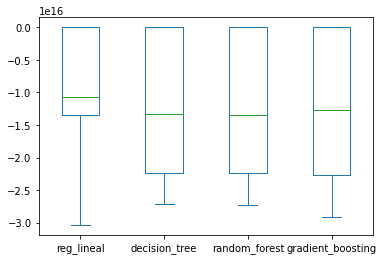

In [ ]:
mape_varsel.plot(kind='box')

In [ ]:
# Hiperparametros
param_grid = [{'n_estimators': [3, 500, 100], 'max_features': [5,20]},
{'bootstrap': [False,True]}]


tun_rf=RandomizedSearchCV(m_rf,param_distributions=param_grid,n_iter=3,scoring="neg_root_mean_squared_error")
tun_rf.fit(X2,y)

resultados=tun_rf.cv_results_
tun_rf.best_params_
pd_resultados=pd.DataFrame(resultados)
pd_resultados[["params","mean_test_score"]]

rf_final=tun_rf.best_estimator_ ### Guardar el modelo con hyperparameter tunning
m_lreg=m_lreg.fit(X2,y)

In [ ]:
pd_resultados[["params","mean_test_score"]]

,params,mean_test_score
0,"{'n_estimators': 100, 'max_features': 5}",-378355.740411
1,{'bootstrap': False},-413758.468409
2,"{'n_estimators': 500, 'max_features': 5}",-378222.929888


In [ ]:
eval =cross_validate(rf_final,X2,y,cv=5,scoring="neg_root_mean_squared_error",return_train_score=True)

In [ ]:
train_rf=pd.DataFrame(eval['train_score'])
test_rf=pd.DataFrame(eval['test_score'])
train_test_rf=pd.concat([train_rf, test_rf],axis=1)
train_test_rf.columns=['train_score','test_score']

In [ ]:
train_test_rf["test_score"].mean()

-377748.2346512602

In [ ]:
predictions=cross_val_predict(m_lreg,X2,y,cv=5)
predictions

array([ 416323.59439645,  160655.72674453,  132184.81430732, ...,
       1378611.53339925, 2025005.04866625, 7230836.37638409])